In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
from scipy.integrate import solve_ivp

$$
\left\{ \begin{array}{l}
\ddot{x}=\phantom{g+} xf(x,y)\\
\ddot{y}= g+yf(x,y)\\
\end{array} \right.
,$$ gdzie
$ f(x,y) = \dfrac{-k}{m}\left(1-\dfrac{l}{\sqrt{x^2+y^2}}\right) $

In [160]:
k=1
l=0.5
m=1
g=-9.81

In [93]:
def f(x,y):
    return -k/m*(1-l/((x**2+y**2)**(1/2)))

In [94]:
def fun(t,u):
    x,y,dx,dy = u
    return dx, dy, x*f(x,y), g + y*f(x,y)

In [95]:
sol=solve_ivp(fun,(0,30),[1,0,0,0],t_eval=np.linspace(0,30,1000))

In [96]:
sol.y

array([[ 1.00000000e+00,  9.99774560e-01,  9.99098456e-01, ...,
        -1.89570486e+00, -1.90051173e+00, -1.90369006e+00],
       [ 0.00000000e+00, -4.42317547e-03, -1.76907091e-02, ...,
        -1.03389926e+01, -1.00343961e+01, -9.73004313e+00],
       [ 0.00000000e+00, -1.50128918e-02, -3.00129654e-02, ...,
        -1.87263291e-01, -1.33008205e-01, -7.87216107e-02],
       [ 0.00000000e+00, -2.94572450e-01, -5.89012187e-01, ...,
         1.01438500e+01,  1.01403855e+01,  1.01278030e+01]])

In [97]:
x=sol.y[0]
y=-sol.y[1]

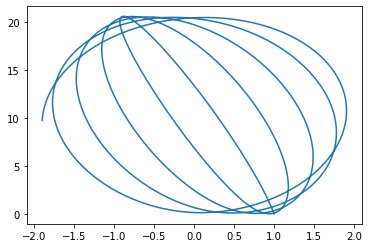

In [98]:
%matplotlib inline
plt.plot(x,y)

<IPython.core.display.Javascript object>


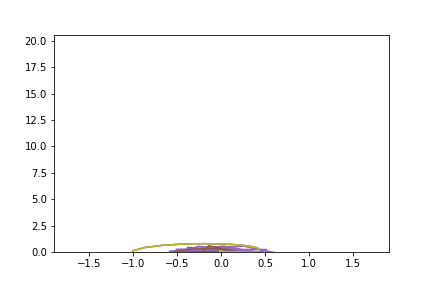

In [100]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
lim=max(abs(max(x)),abs(min(x)),abs(max(y)),abs(min(y)))
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))


def animate(i):
    line.set_data(x[:i],y[:i])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(x), interval=10,repeat=True)
plt.show()

$$
\left\{ \begin{array}{l}
\ddot{r}= g \cos\theta - \frac{k}{m}r+(l+r)\dot\theta\\
\ddot{\theta}(l+r) = -g\sin\theta + 2 \dot\theta\dot{r}
\end{array} \right.
$$

$$
\left\{ \begin{array}{l}
\ddot{r}= g \cos\theta - \frac{k}{m}r+(l+r)\dot\theta^2\\
\ddot{\theta}(l+r) = -g\sin\theta - 2 \dot\theta\dot{r}
\end{array} \right.
$$

In [161]:
def func(t,u):
    r,theta,dr,dtheta = u
    return dr, dtheta, g*np.cos(theta)-k/m*r+(l+r)*dtheta, (-g*np.sin(theta) + 2*dtheta*dr)/(l+r)

In [168]:
def func2(t,u):
    r,theta,dr,dtheta = u
    return dr, dtheta, g*np.cos(theta)-k/m*r+(l+r)*dtheta**2, (-g*np.sin(theta) - 2*dtheta*dr)/(l+r)

In [169]:
sol=solve_ivp(func,(0,30),[0,np.pi/3,0,0],t_eval=np.linspace(0,30,1000))

In [173]:
sol2=solve_ivp(func2,(0,30),[0,np.pi/3,0,0],t_eval=np.linspace(0,30,1000))

In [174]:
x=(sol.y[0]+l)*np.cos(sol.y[1])
y=(sol.y[0]+l)*np.sin(sol.y[1])

In [175]:
x2=(sol2.y[0]+l)*np.cos(sol2.y[1])
y2=(sol2.y[0]+l)*np.sin(sol2.y[1])

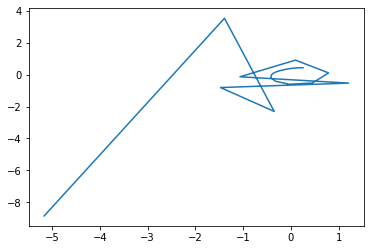

In [167]:
%matplotlib inline
plt.plot(x,y)

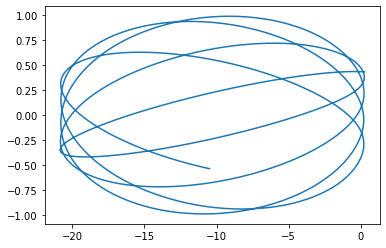

In [176]:
%matplotlib inline
plt.plot(x2,y2)

In [165]:
sol.y[0]

array([ 0.00000000e+00, -2.16835334e-03, -8.46154184e-03, -1.84922150e-02,
       -3.17467546e-02, -4.75900677e-02, -6.53079403e-02, -8.41072429e-02,
       -1.03115330e-01, -1.21333895e-01, -1.37610103e-01, -1.50712695e-01,
       -1.59340040e-01, -1.62120133e-01, -1.57665045e-01, -1.44441893e-01,
       -1.20670600e-01, -8.49128155e-02, -3.61049600e-02,  2.64474123e-02,
        1.02945551e-01,  1.91681165e-01,  2.93354989e-01,  4.14550846e-01,
        5.77394603e-01,  8.16041285e-01,  1.18422651e+00,  1.83401461e+00,
        3.30077372e+00,  9.75774522e+00])

In [138]:
sol.y[1]

array([ 1.04719755e+00,  1.03952494e+00,  1.01637904e+00,  9.77385317e-01,
        9.21939869e-01,  8.49217105e-01,  7.58169767e-01,  6.47528927e-01,
        5.15754760e-01,  3.61149072e-01,  1.82144986e-01, -2.26852416e-02,
       -2.54630220e-01, -5.14839426e-01, -8.04175805e-01, -1.12114320e+00,
       -1.46159691e+00, -1.81963201e+00, -2.18758569e+00, -2.55603724e+00,
       -2.91384289e+00, -3.25159520e+00, -3.56074334e+00, -3.83410276e+00,
       -4.06772021e+00, -4.26087374e+00, -4.41591723e+00, -4.53586662e+00,
       -4.62568329e+00, -4.69180694e+00, -4.74133871e+00, -4.78177567e+00,
       -1.34167302e+01, -6.62192859e+01, -7.48762799e+01])

In [148]:
x

array([ 2.50000000e-01,  2.50044136e-01,  2.50176485e-01,  2.50396986e-01,
        2.50705611e-01,  2.51102364e-01,  2.51587284e-01,  2.52160437e-01,
        2.52821923e-01,  2.53571873e-01,  2.54410445e-01,  2.55337830e-01,
        2.56354245e-01,  2.57459939e-01,  2.58655185e-01,  2.59940286e-01,
        2.61315570e-01,  2.62781389e-01,  2.64338125e-01,  2.65986179e-01,
        2.67725977e-01,  2.69557967e-01,  2.71482586e-01,  2.73500306e-01,
        2.75611642e-01,  2.77817125e-01,  2.80117298e-01,  2.82512714e-01,
        2.85003938e-01,  2.87591544e-01,  2.90276111e-01,  2.93058225e-01,
        2.95938475e-01,  2.98917452e-01,  3.01995746e-01,  3.05173945e-01,
        3.08452633e-01,  3.11832387e-01,  3.15313774e-01,  3.18897349e-01,
        3.22583654e-01,  3.26373213e-01,  3.30266528e-01,  3.34264079e-01,
        3.38366320e-01,  3.42573673e-01,  3.46886526e-01,  3.51305232e-01,
        3.55830099e-01,  3.60461390e-01,  3.65199320e-01,  3.70044047e-01,
        3.74995669e-01,  